***Chapter 5***

### Example: Stolen cars recovered
Assume $p=0.6$, $n=3$. Find $P(X=1)$.

0.28800000000000003


<BarContainer object of 4 artists>

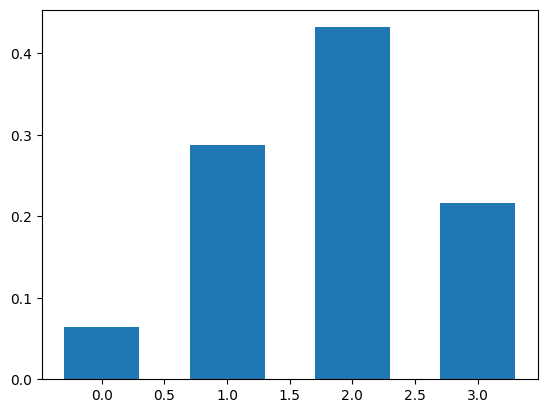

In [3]:
from math import comb
import matplotlib.pyplot as plt
n=3
p=0.6
x=1

# Direct formula
p_x1 = comb(n,x) * (p**x) * ((1-p)**(n-x))
print(p_x1)

pmf_car_values = []

x_values = range(0, n + 1)
for x in x_values:
    pmf = comb(n, x) * (p**x) * ((1 - p)**(n - x))
    pmf_car_values.append(pmf)

plt.bar(x_values, pmf_car_values, width=0.6)


### Example: Pass rate (Slide 12)
If $P(\text{pass})=0.8$ and $n=10$ students:
1. $P(X=10)$
2. $P(X=3)$
3. $P(X\ge 8)$

0.10737418240000006 0.000786431999999999 0.6777995264000002
0.10737418240000006
0.000786431999999999
0.6777995264000002


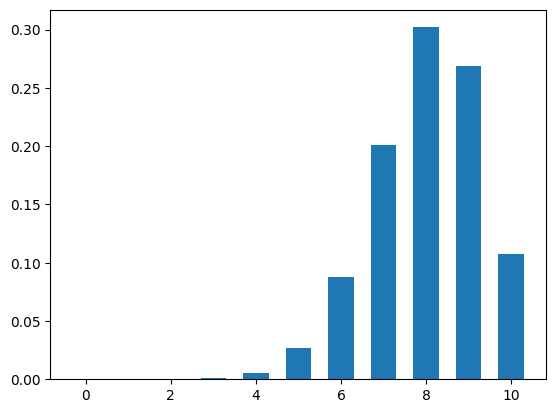

In [4]:
n=10
p=0.8

# (a) all 10 pass
pa = (p**10)

# (b) 3 pass
pb = comb(n,3) * (p**3) * ((1-p)**(n-3))

# (c) at least 8 pass
pc = sum(comb(n,x) * (p**x) * ((1-p)**(n-x)) for x in range(8, n+1))

print(pa, pb, pc)

x_values = range(0, n + 1)
pmf_values = []
for x in x_values:
    pmf = comb(n, x) * (p**x) * ((1 - p)**(n - x))
    pmf_values.append(pmf)

plt.bar(x_values, pmf_values, width=0.6)

print(pmf_values[10])
print(pmf_values[3])
print(sum(pmf_values[8:11])) # python is end exclusive



### Example: Binomial + mean/variance (Slide 15)
If 70% of purchases are made with a credit card and $X$ is the number among 10 purchases made with a credit card:
1. Distribution
2. $E[X]$
3. $\mathrm{Var}(X)$
4. $P(|X-\mu|\le\sigma)$

In [5]:
import math
n=10
p=0.7

mu = n*p
var = n*p*(1-p)
sigma = math.sqrt(var)

pmf = sum(comb(n,x) * (p**x) * ((1-p)**(n-x)) for x in range(math.ceil(mu-sigma)
, math.floor(mu+sigma)+1))


mu, var, sigma, pmf


(7.0, 2.1000000000000005, 1.449137674618944, 0.7004233215)

### Example: Lot acceptance
You ship a lot of $N=24$ cameras. An inspector samples $n=4$ and rejects the lot if any defective is found.
You know $k=3$ are defective. Find $P(\text{lot accepted})$.

Accepted means **0 defectives in the sample**, i.e., $P(X=0)$.

In [9]:
N=24
n=4
k=3
x=0

p_accept = (math.comb(k, x) * math.comb(N-k, n-x)) / math.comb(N, n)
print(p_accept)



0.5632411067193676


In [39]:
mu = n*(k/N)
var = ((N-n)/(N-1)) * n*(k/N)*(1 - (k/N))
mu, var

(0.5, 0.3804347826086956)

### Example with box of balls
A box contains 4 red balls and 6 blue balls.
(a) Four balls are drawn with replacement.
(b) Four balls are drawn without replacement.
What is the probability of drawing exactly 2 red balls?

<BarContainer object of 5 artists>

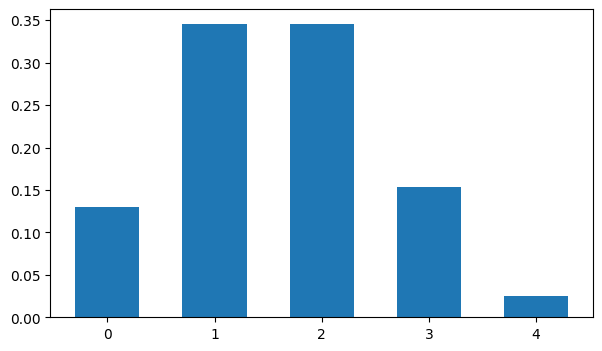

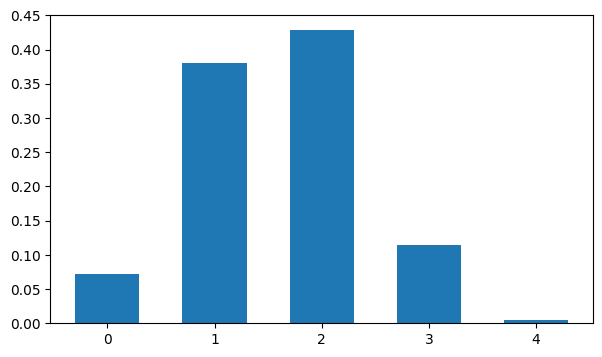

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

red = 4
blue = 6
total = red + blue
n = 4

p_red = red / total

k = np.arange(0, n + 1)

P_binomial = [
    math.comb(n, i) * (p_red**i) * ((1 - p_red)**(n - i))
    for i in k
]

P_hypergeom = [
    (math.comb(red, i) * math.comb(blue, n - i)) / math.comb(total, n)
    for i in k
]

# Plot
plt.figure(figsize=(7, 4))

plt.bar(k, P_binomial, width=0.6)

plt.figure(figsize=(7, 4))

plt.bar(k, P_hypergeom, width=0.6)


### Example: Creatures captured (Slide 24)
Let $X\sim\mathrm{Poisson}(\lambda=4.5)$.
1. $P(X=5)$
2. $P(X\le 5)$
3. $P(X\ge 5)$

0.17082685848611195
0.7029304348608274
0.4678964236252845


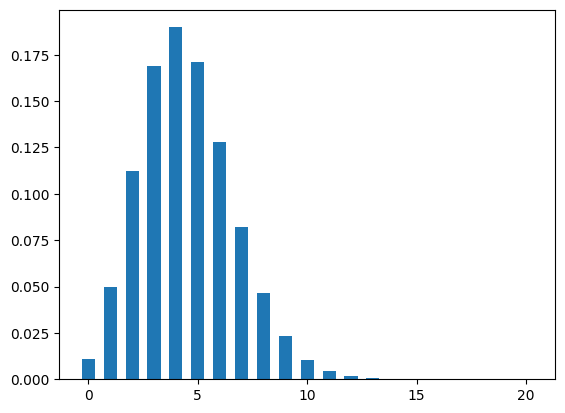

In [48]:
lam = 4.5  # here, lambda*t is already 4.5 for a week
x_values = range(0, 21)

pmf_values = []
for x in x_values:
  p = math.exp(-lam)*(lam**x)/math.factorial(x)
  pmf_values.append(p)

plt.bar(x_values, pmf_values, width=0.6)

print(pmf_values[5])
print(sum(pmf_values[0:6]))
print(1 - sum(pmf_values[0:5]))


In [ ]:
mu = lam
var = lam_t
mu, var

### Example: Arrivals at a counter (Slide 26)
Pulses arrive at average rate $\lambda=6$ per minute.
For a 0.5-minute interval ($t=0.5$): $\lambda t=3$.

1. $P(X\ge 1)$
2. Mean number of pulses in the interval

0.950212931632136


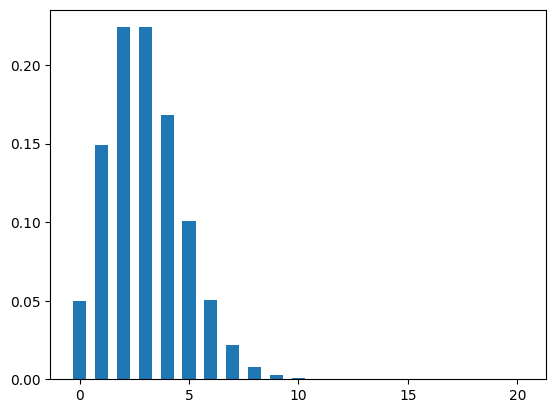

In [67]:
lam = 6   # per minute
t = 0.5   # minutes

lamt = lam*t
pmf_values = []
for x in x_values:
  p = math.exp(-lamt)*(lamt**x)/math.factorial(x)
  pmf_values.append(p)

plt.bar(x_values, pmf_values, width=0.6)

print(1 - pmf_values[0])



A factory produces screws, and 0.1% are defective.
A box contains 2000 screws.
What is the probability the box has exactly 3 defective screws?

In [14]:
p_defective = 0.001
n_screws = 2000
k = 3

P_binomial = comb(n_screws, k) * (p_defective ** k) * ((1 - p_defective) ** (n_screws - k))
lam = n_screws * p_defective
P_poisson = math.exp(-lam) * (lam ** k) / math.factorial(k)

P_binomial, P_poisson



(0.18053732803180317, 0.1804470443154836)